# BioSentVec Tutorial

This tutorial provides a fundemental introduction to our BioSentVec models. It illustrates (1) how to load the model, (2) an example function to preprocess sentences, (3) an example application that uses the model and (4) further resources for using the model more broadly.

## 1. Prerequisites

Please download BioSentVec model and install all the related python libraries

In [1]:
import sent2vec
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from scipy.spatial import distance

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jplasser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jplasser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 2. Load BioSentVec model

Please specify the location of the BioSentVec model to model_path. It may take a while to load the model at the first time.

In [2]:
model_path = '/Users/jplasser/Downloads/BioSentVec_PubMed_MIMICIII-bigram_d700.bin'
model = sent2vec.Sent2vecModel()
try:
    model.load_model(model_path)
except Exception as e:
    print(e)
print('model successfully loaded')

model successfully loaded


## 3. Preprocess sentences

There is no one-size-fits-all solution to preprocess sentences. We demonstrate a representative code example as below. This is also consistent with the preprocessing appaorach when we trained BioSentVec models.

In [8]:
stop_words = set(stopwords.words('english'))
def preprocess_sentence(text):
    text = text.replace('/', ' / ')
    text = text.replace('.-', ' .- ')
    text = text.replace('.', ' . ')
    text = text.replace('\'', ' \' ')
    text = text.lower()

    tokens = [token for token in word_tokenize(text) if token not in punctuation and token not in stop_words]

    return ' '.join(tokens)

An example of using the preprocess_sentence function: 

In [9]:
sentence = preprocess_sentence('Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis.')
print(sentence)

breast cancers her2 amplification higher risk cns metastasis poorer prognosis


## 4. Retrieve a sentence vector

Once a sentence is preprocessed, we can pass it to the BioSentVec model to retrieve a vector representation of the sentence.

In [10]:
sentence_vector = model.embed_sentence(sentence)
print(sentence_vector)

[[ 0.27253592  0.04016513 -0.13868049  0.06607066  0.03410426  0.03702081
   0.04780459  0.318374    0.1389506   0.14894584  0.03802885  0.16076139
   0.27367333  0.28947747 -0.3635127   0.1523829   0.00113982  0.15947492
  -0.00115095 -0.3911827   0.06040372 -0.30060792  0.5700456  -0.3073153
   0.05641874 -0.38538572  0.03242918 -0.01758919 -0.53824794 -0.2036874
   0.09088504  0.42208442  0.01777515  0.26457042  0.00444555 -0.4244185
   0.08552625 -0.01220523 -0.52954006 -0.19729511  0.3146897   0.39812556
  -0.73728865 -0.15572241  0.12493155 -0.189124    0.30150056 -0.13335498
  -0.22929646  0.1923776  -0.25276372  0.48184827 -0.11678692  0.074292
  -0.3565283   0.06902904 -0.16303737 -0.1516651  -0.16457589  0.2640424
  -0.2330729   0.03231101  0.3361209   0.35289383 -0.23463576 -0.29648
  -0.3083266   0.39252853 -0.24566592 -0.2444962   0.20645703 -0.04719147
   0.10580424  0.00649089 -0.2572806  -0.333023   -0.03018534 -0.042082
  -0.03446042  0.1267659   0.37817308 -0.38865507

Note that you can also use embed_sentences to retrieve vector representations of multiple sentences.

The shape of the vector representation depends on the dimension parameter. In this case, we set the dimension to 700: 

In [11]:
print(sentence_vector.shape)

(1, 700)


## 5. Compute sentence similarity

In this section, we demonstrate how to compute the sentence similarity between a sentence pair using the BioSentVec model. We firstly use the above code examples to get vector representations of sentences. Then we compute the cosine similarity between the pair.

In [12]:
sentence_vector1 = model.embed_sentence(preprocess_sentence('Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis.'))
sentence_vector2 = model.embed_sentence(preprocess_sentence('Breast cancers with HER2 amplification are more aggressive, have a higher risk of CNS metastasis, and poorer prognosis.'))

cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector2)
print('cosine similarity:', cosine_sim)

cosine similarity: 0.9813870787620544


Here is another example for a pair that is relatively less similar.

In [13]:
sentence_vector3 = model.embed_sentence(preprocess_sentence('Furthermore, increased CREB expression in breast tumors is associated with poor prognosis, shorter survival and higher risk of metastasis.'))
cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector3)
print('cosine similarity:', cosine_sim)

cosine similarity: 0.7300089001655579


# more experiments with MIMIC-III data

In [15]:
text = "The patient is a 46 year old gentleman with past medical history including end stage HIV, placement on   Hospital.  Patient also has past medical history significant for polysubstance abuse including cocaine, hepatitis C and cirrhosis.  Patient was transferred to  from an outside hospital for recurrent v-fib arrest in the setting of having an ICD placed one week prior to admission.  Patient was found down on the morning of admission by a neighbor. unresponsive, called EMS.  When EMS came, patient remained unresponsive, but his vital signs were stable.  He had a paced rhythm.  He had normal blood pressure and normal oxygen saturation.  Patient was then transferred to an outside hospital in .  While there his ICD discharged at least two times for episodes of ventricular tachycardia. Rhythm strips from the outside hospital were not available at the time of admission.  Per report patient was given amiodarone 150 mg IV three times and he was given magnesium sulfate 4 gm IV for magnesium level of 1.6.  Med-Flight then transferred patient to  as CCU beds were not available elsewhere.  En route to the hospital patient experienced another two episodes of v-fib and his ICD discharged each time, converting patient back into paced rhythm.  During the shocks patient was reported to be alert.  He denied chest pain, shortness of breath, had stable blood pressure and stable oxygen saturation.  On arrival to the CCU patient experienced two shocks from his ICD for torsades.  Amiodarone was continued at 1 mg per minute.  Patient went into v-fib arrest two times just after his admission.  Again the ICD converted him back into a stable paced rhythm.  Again his sats and blood pressure remained stable with these episodes.|HIV.  Last CD4 count 438, last viral load less than 50 copies per ml from his outpatient infectious disease physician's notes in his medical record. These levels were from .  HIV course is complicated by nonischemic cardiomyopathy and also complicated by candidal esophagitis.  Hepatitis C and cirrhosis presumed secondary to IV drug abuse.  Hep A positive as well.  Nonischemic cardiomyopathy with EF of 20%. Patient had cardiac cath in  that was negative for coronary artery disease.  Patient is also status post ICD placement on   Hospital. Patient is status post DDD pacer placed four years ago for complete heart block.  Polysubstance abuse including crack cocaine, heroin and alcohol.  Patient stated on admission that he had been using crack cocaine for the week prior to admission.  Most recent use was three days prior to admission.  Chronic renal insufficiency.  Uncertain of baseline creatinine.  Old hospital records from   indicate that the renal failure was secondary to diuretic over-use.  Peripheral neuropathy.  B-12 deficiency and macrocytic anemia.  Stasis dermatitis and eosinophilic folliculitis.  Asthma.|Abacavir 300 mg b.i.d., saquinavir 400 mg b.i.d., Combivir tabs one b.i.d., Norvir|00 mg b.i.d., Protonix 40 q.day, trazodone 100 q.h.s., lisinopril 10 b.i.d., Lasix 80 b.i.d., methadone 250 mg q.d., Lexapro 10 mg q.d., digoxin 125 mcg q.d., Bactrim one double strength q.d., Zyrtec 10 q.d., sublingual nitroglycerin p.r.n., triamcinolone cream, albuterol inhaler p.r.n.|The patient denied any recent illness. He states that since the ICD had been placed, he has felt fatigued, but denies chest pain, shortness of breath.  He does admit to recent crack cocaine use, most recently three days prior to admission.|The patient states that he was clean and sober for three years until this past week.  He states that the stress of his illness and his mother's illness, who is bed bound status post CVA, had prompted this use.  Patient lives alone and states that he has been very depressed at home and felt that his family avoids him because of his HIV status and feels that he cannot take care of himself appropriately.  His sister and his niece do look in on him frequently, however.  Per report of his sister and his niece, his house is disordered and they comment that patient is barely functional.  Patient has a history of smoking, alcohol abuse and cocaine use as stated previously.|Vital signs on admission included temperature of 98.2, pulse 66, blood pressure 104 to 130 over|4 to 65, respiratory rate 14, sat 100% on 10 liters nasal cannula, weight 74 kg. In general, patient was alert and oriented times two, alert to person and place, but not time. He denied any distress.  He appeared disheveled, but otherwise did not appear in any discomfort.  HEENT pupils equal, round and reactive to light and accommodation. Oropharynx clear without lesions.  Heart regular rate and rhythm, S1, S2, prominent S3,  to  holosystolic murmur at the left upper and left lower sternal borders, does not radiate to carotids, does not radiate to axillae.  PMI laterally displaced.  Right ventricular heave.  JVP markedly elevated at 14 cm.  Lungs bibasilar crackles, left greater than right.  Abdominal exam soft, nondistended, nontender, hepatomegaly 3 cm beneath the costal margin.  Extremities no cyanosis, clubbing or edema with good distal pulses.  Neuro cranial nerves II-XII intact.  Strength grossly normal. Sensation grossly normal.|From the outside hospital data included magnesium of 1.6.  Tox screen included serum, ethanol, salicylates, acetaminophen and tricyclic levels which were all negative.  Digoxin level was normal at 0.85, normal being|.9 to 2.0.  CK 226, MB 3.3, troponin I 0.1.  Hematocrit|0.8, white count 5.4, platelets 155.  Chem-7 132, 4.0, 92,|6, 16, 1.5, 138.  Calcium 8.2.  Chest x-ray from the outside hospital showed cardiomegaly with clear lung fields.  Head CT at the outside hospital, performed because patient had an unwitnessed fall, was read at the outside hospital as possible evolving left parietal infarct with no evidence of bleed.  However, this head CT was read by our radiologists as no evidence of stroke or hemorrhage.  EKG showed wide complex rhythm of left bundle morphology, rate 100 with paced beat preceded by a P and followed by a nonpaced ventricular beat, QTc 433.  Strips from Med-Flight consistent with polymorphic VT of torsade type.  Echo one week prior to admission from outside hospital showed moderate MR  , left ventricular hypokinesis, EF 20%.  Lab data from admission to  hematocrit 32.8, white count 4.7, platelets 159.  Chemistry sodium 133, potassium 4.8, chloride 96, bicarb 26, BUN 20, creatinine 1.2, glucose 148.  Calcium 8.6, mag 2.6, phos 4.9, albumin 3.6.  Serum tox was negative for benzo, negative for barbiturates.  Urine tox was performed that was positive for cocaine and positive for methadone.  UA was negative for UTI.|1.  Cardiology. Rhythm.  For patient's recurrent torsades he was initially continued on an amio drip at 1 mg per minute.  As the QT was prolonged, patient was switched from amio to a lidocaine drip as lidocaine decreases the QT interval while amio increases the QT interval.  Patient's pacer was interrogated on the night of admission and reprogrammed.  On interrogation it was revealed that patient had 16 episodes of v-fib with heart rate between 200 to 230 beats per minute, requiring 17 joules and then 31 joules to convert patient back into a paced rhythm.  His pacer was a DDD that was originally set for 50 to 120 beats per minute with paced AV at 180 msec.  The mode was changed by the EP Fellow to DDD at|0 to 120 beats per minute with the thinking that increasing the rate of pacing would shorten the QT interval and hopefully prevent recurrent torsade.  The pacer was also changed so that the VF zone first shock to patient at 31 joules rather than 17 joules as patient was requiring 31 joules of energy to convert him back to a paced rhythm. Patient's magnesium was checked frequently and magnesium after repletion was stable at 2.6.  The patient was kept on a lidocaine drip from admission until 5:00 a.m. on the morning of .  At this time patient began to experience visual hallucinations and became slightly agitated.  Therefore, the lidocaine drip was decreased from 3 mg per minute to 1 mg per minute.  However, as patient's agitation continued even with the decreased dose of lidocaine, the lidocaine drip was stopped at 7:00 a.m.  Patient was switched to mexiletine 100 mg p.o. b.i.d. as this is also a class Ib antiarrhythmic. Patient tolerated this medication much better and his neurological status cleared.  He no longer had visual hallucinations and he tolerated the mexiletine dose quite well.  Patient was also started on labetalol 100 mg b.i.d. This beta blocker was chosen as patient's urine tox was positive for cocaine.  He also tolerated this medication well.  Patient had no repeat episodes of ventricular tachycardia or ventricular fibrillation during his hospital course.|  17:18 T:    12:39 JOB#:  "

In [107]:
sentence_vector1 = model.embed_sentence(preprocess_sentence(text[:100]))
sentence_vector2 = model.embed_sentence(preprocess_sentence(text[:500]))

cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector2)
print('cosine similarity:', cosine_sim)

cosine similarity: 0.7530670166015625


In [19]:
import pickle

train_data = pickle.load(open('/Users/jplasser/Documents/AI Master/WS2021/MastersThesis/code.nosync/CNEP/src/data/mimic3/full_train_data_unique.pickle', 'rb'))
#val_data = pickle.load(open('/home/thetaphipsi/MasterAI/src/CNEP/src/data/mimic3/full_val_data_unique.pickle', 'rb'))
#test_data = pickle.load(open('/home/thetaphipsi/MasterAI/src/CNEP/src/data/mimic3/full_test_data_unique.pickle', 'rb'))

In [82]:
import seaborn as sns
import numpy as np
import torch

def plot_similarity(labels, features, rotation, print_labels=True):
    print(f"{features.shape=}")
    corr = np.inner(features, features)
    #print(corr)
    labels = [m[:25] + '/' + str(len(m)) for m in labels]
    sns.set(rc = {'figure.figsize':(20,12)})
    sns.set(font_scale=1.2)
    g = sns.heatmap(corr,
                      xticklabels=labels,
                      yticklabels=labels,
                      vmin=0,
                      vmax=1,
                      annot=print_labels, fmt='.1f',
                      cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_, seq_len):
    message_embeddings_ = torch.stack([torch.nn.functional.normalize(
        torch.tensor(
            model.embed_sentence(
                preprocess_sentence(
                    m[:seq_len] + m[-seq_len:]
                )
            )
        )
    ) for m in messages_])
    message_embeddings_.shape
    message_embeddings_ = message_embeddings_.reshape(len(messages_),-1)
    plot_similarity(messages_, message_embeddings_, 90)

[13575, 8468, 1819, 8999, 12766, 1743, 7984, 2328, 4762, 13313, 6352, 4283, 3001, 13385, 5787, 13483, 10903, 2201, 1806, 8764]
features.shape=torch.Size([20, 700])


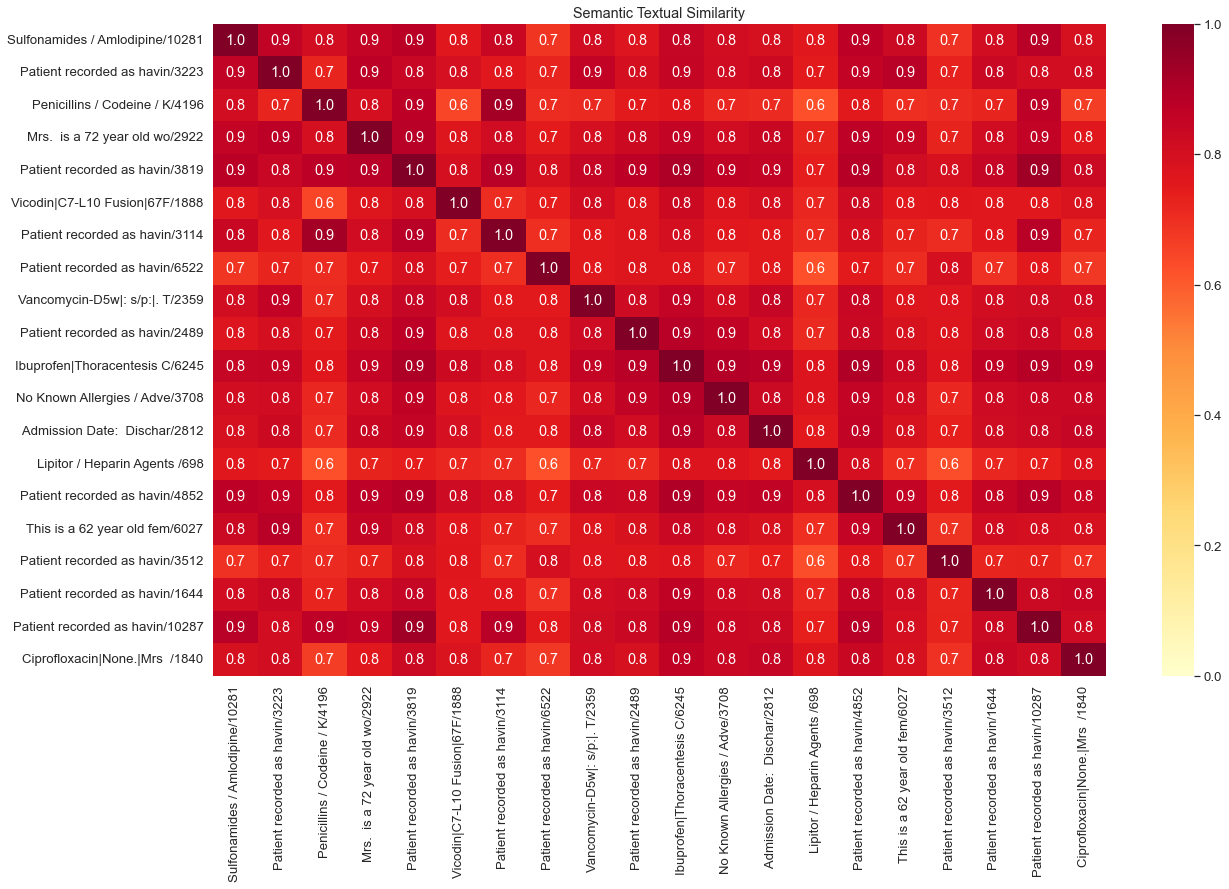

In [252]:
import random

n = 20
idx = random.sample(list(np.arange(len(train_data['notes']))), n)
print(idx)
#messages = train_data['notes'][:-1:len(train_data['notes'])//10]
messages = train_data['notes'][idx]
run_and_plot(messages, 2000)

In [64]:
text[:20], text[-20:]

('The patient is a 46 ', ' T:    12:39 JOB#:  ')

In [88]:
np.arange(len(train_data['notes']))

array([    0,     1,     2, ..., 13778, 13779, 13780])

In [228]:
from tqdm import tqdm

embeds = []
seq_len = 2000

text1 = train_data['notes'][0]

max_cosine = 0.
best_idx = 0

sentence_vector1 = model.embed_sentence(preprocess_sentence(text1[:seq_len]))
sims = []
embeds.append(sentence_vector1)

for i in tqdm(range(len(train_data['notes'])-1)):
    text2 = train_data['notes'][i+1]
    sentence_vector2 = model.embed_sentence(preprocess_sentence(text2[:seq_len]))
    cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector2)
    sims.append(cosine_sim)
    embeds.append(sentence_vector2)
    
    if cosine_sim > max_cosine:
        max_cosine = cosine_sim
        best_idx = i+1

print(f"cosine similarity {max_cosine} with index {best_idx}.")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13780/13780 [00:29<00:00, 462.41it/s]

cosine similarity 0.8858470320701599 with index 9697.


In [229]:
np.argmax(sims)+1, np.argmin(sims)+1

(9697, 3882)

<AxesSubplot:ylabel='Count'>

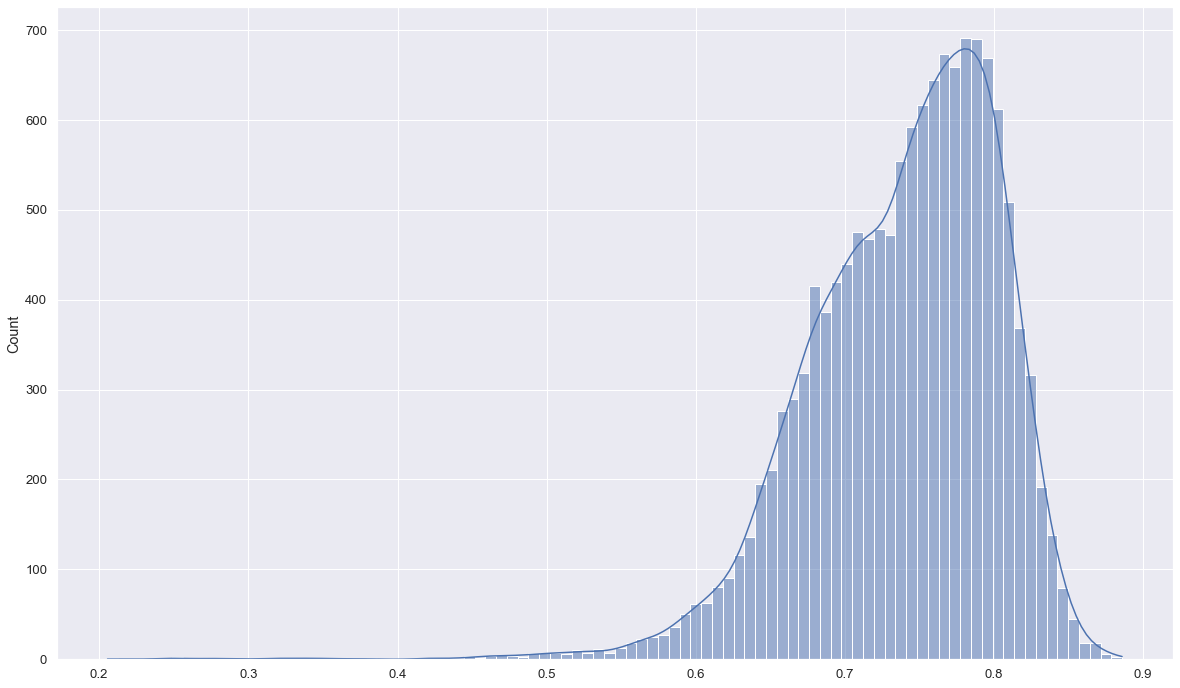

In [232]:
sns.histplot(sims, kde=True)

In [233]:
text1 = train_data['notes'][0]
text2 = train_data['notes'][best_idx]
sentence_vector1 = embeds[0] #model.embed_sentence(preprocess_sentence(text1))
sentence_vector2 = embeds[best_idx] #model.embed_sentence(preprocess_sentence(text2))

cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector2)
print(f"cosine similarity {cosine_sim} with index {best_idx}.")

cosine similarity 0.8858470320701599 with index 9697.


In [234]:
text1 = train_data['notes'][0]
text2 = train_data['notes'][best_idx]

sims_se = []
for i in tqdm(range(50,2000)):
    sentence_vector1 = model.embed_sentence(preprocess_sentence(text1[:i+1]))
    sentence_vector2 = model.embed_sentence(preprocess_sentence(text2[:i+1]))

    cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector2)
    sims_se.append(cosine_sim)
    #print(f"cosine similarity {cosine_sim} with index {best_idx}.")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 595.80it/s]


In [235]:
sims[1]

0.7721521854400635

<AxesSubplot:>

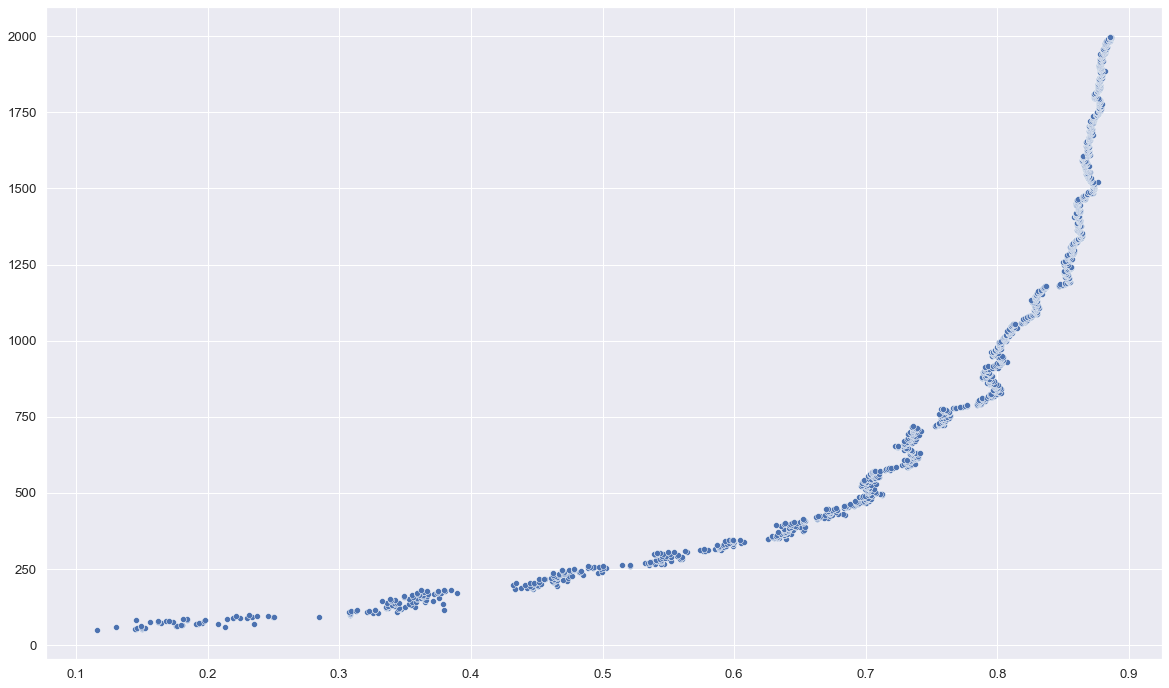

In [237]:
#sns.histplot(sims)
sns.scatterplot(x=sims_se, y=range(50,2000))

In [240]:
a = np.array(sims)
np.where(np.logical_and(a>=0.88, a<=1.))

(array([ 9696, 12693]),)

In [241]:
worst_idx = np.argmin(sims)+1
text1 = train_data['notes'][0]
text2 = train_data['notes'][worst_idx]
sentence_vector1 = embeds[0] #model.embed_sentence(preprocess_sentence(text1))
sentence_vector2 = embeds[worst_idx] #model.embed_sentence(preprocess_sentence(text2))

cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector2)
print(f"cosine similarity {cosine_sim} with index {worst_idx}.")

cosine similarity 0.20556935667991638 with index 3882.


In [242]:
text1 = train_data['notes'][0]
text2 = train_data['notes'][worst_idx]

sims_se = []
for i in tqdm(range(50,seq_len)):
    sentence_vector1 = model.embed_sentence(preprocess_sentence(text1[:i+1]))
    sentence_vector2 = model.embed_sentence(preprocess_sentence(text2[:i+1]))

    cosine_sim = 1 - distance.cosine(sentence_vector1, sentence_vector2)
    sims_se.append(cosine_sim)
    #print(f"cosine similarity {cosine_sim} with index {best_idx}.")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:01<00:00, 1012.05it/s]


<AxesSubplot:>

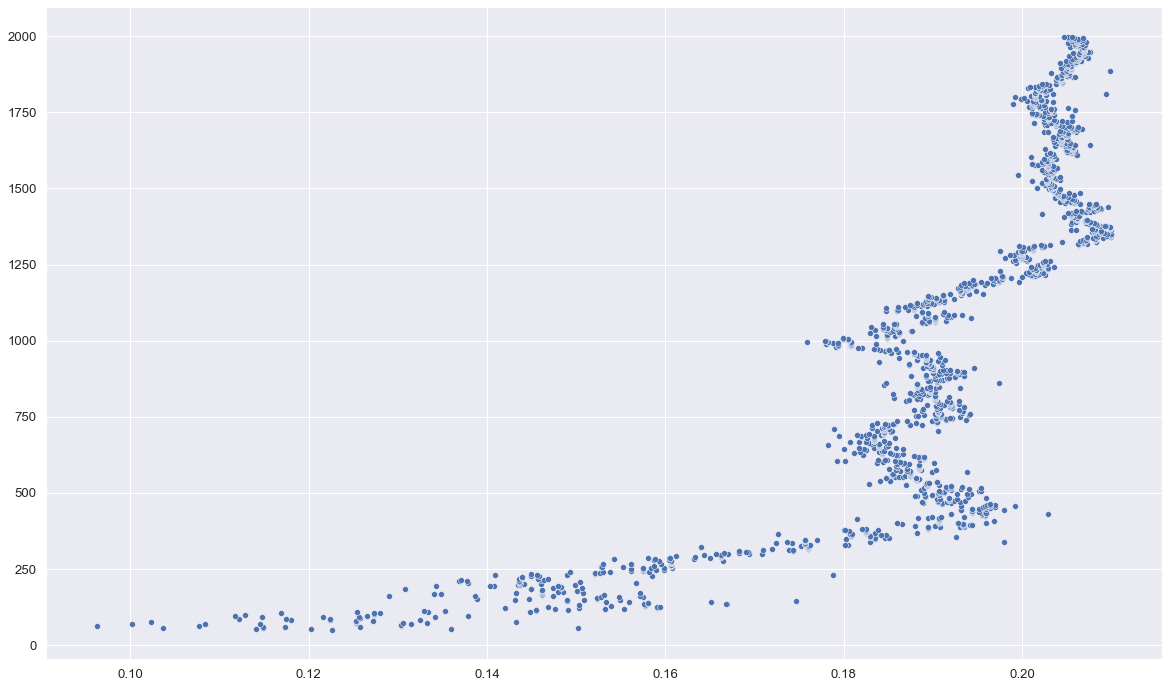

In [243]:
sns.scatterplot(x=sims_se, y=range(50,seq_len))

In [245]:
a = np.array(sims_se)
np.where(np.logical_and(a>=0.21, a<=0.2169094979763031))

(array([1315]),)

# generate data sets with embeds included

In [279]:
seq_len = 2000
data_path = '/Users/jplasser/Documents/AI Master/WS2021/MastersThesis/code.nosync/CNEP/src/data/mimic3/'

datasets = ['train','val','test']

for dataset in datasets:
    embeds = []
    train_data = pickle.load(open(f'{data_path}full_{dataset}_data_unique.pickle', 'rb'))

    for i in tqdm(range(len(train_data['notes']))):
        sentence_vector = model.embed_sentence(preprocess_sentence(train_data['notes'][i][:seq_len]))
        embeds.append(sentence_vector.reshape(-1))
        
    embeds = np.array(embeds)
    print(train_data['inputs'].shape, embeds.shape)
    train_data['embeds'] = embeds
    pickle.dump(train_data, open(f'{data_path}full_{dataset}_data_unique_embed.pickle', 'wb'))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13781/13781 [00:30<00:00, 452.09it/s]


(13781, 48, 390) (13781, 700)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4403/4403 [00:09<00:00, 460.46it/s]


(4403, 48, 390) (4403, 700)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4424/4424 [00:09<00:00, 465.78it/s]


(4424, 48, 390) (4424, 700)


## 6. More resources

The above example demonstrates an unsupervised way to use the BioSentVec model. In addition, we summarize a few useful resources:

#### (1) The Sent2vec homepage (https://github.com/epfml/sent2vec) has a few pre-trained sentence embeddings from general English copora. 
#### (2) You can also develop deep learning models to learn sentence similarity in a supervised manner.
#### (3) You can also use the BioSentVec in other applications, such as multi-label classification.

## Reference

When using some of our pre-trained models for your application, please cite the following paper:

Chen Q, Peng Y, Lu Z. BioSentVec: creating sentence embeddings for biomedical texts. 2018. arXiv:1810.09302.